Prediction Using Decision Tree Algorithm

Import the libraries

In [1]:

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

Read the data set

In [2]:
Iris_data = pd.read_csv("Iris2.csv")

In [3]:
Iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
Iris_data.shape

(150, 6)

The dataset contains 150 Rows and 6 Columns

Descriptive statistics of the dataset

In [5]:
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
#drop ID column as it does not have much use
Iris_data = Iris_data.drop(['Id'], axis=1)

In [7]:
Iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
Iris_data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null records in dataset

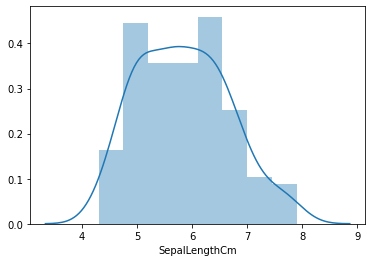

In [10]:
#Checking the distribution of data
sns.distplot(Iris_data.SepalLengthCm)

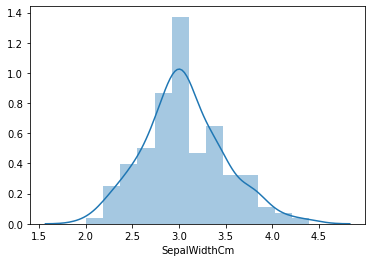

In [11]:
sns.distplot(Iris_data.SepalWidthCm)

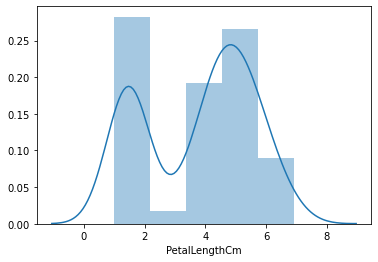

In [12]:
sns.distplot(Iris_data.PetalLengthCm)

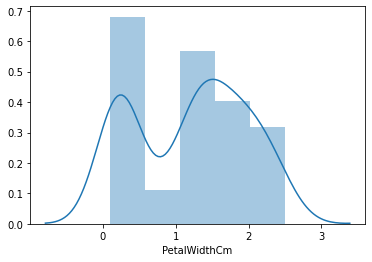

In [13]:
sns.distplot(Iris_data.PetalWidthCm)

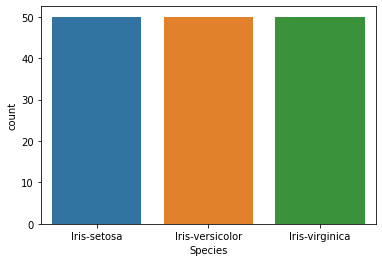

In [14]:
sns.countplot(Iris_data.Species)

Checking outliers present in the attributes

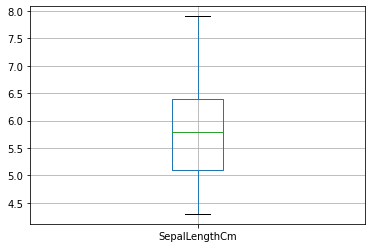

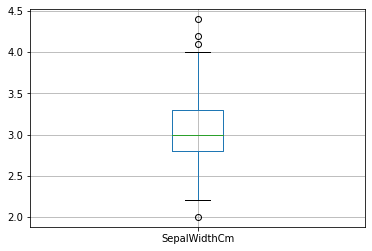

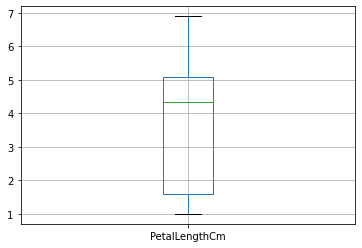

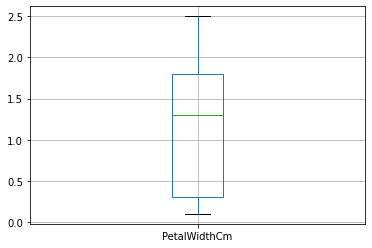

In [15]:
Iris_data.boxplot(column=['SepalLengthCm'])
plt.show()
Iris_data.boxplot(column=['SepalWidthCm'])
plt.show()
Iris_data.boxplot(column=['PetalLengthCm'])
plt.show()
Iris_data.boxplot(column=['PetalWidthCm'])
plt.show()

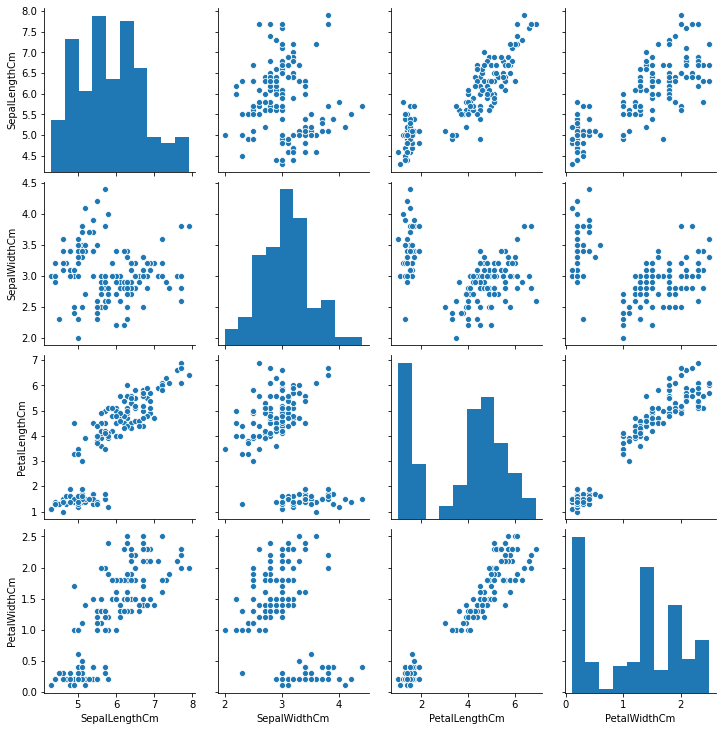

In [16]:
sns.pairplot(Iris_data)
plt.show()

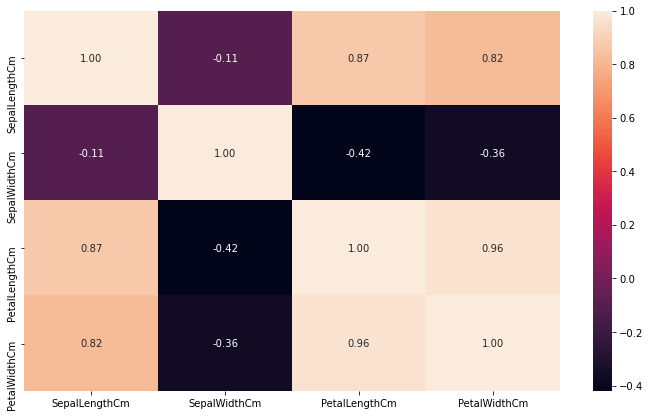

In [17]:
plt.figure(figsize=(12,7))
sns.heatmap(Iris_data.corr(), annot=True, fmt='.2f')
plt.show()

In [18]:
for feature in Iris_data.columns: 
    if Iris_data[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Iris_data[feature].unique()))
        print(pd.Categorical(Iris_data[feature].unique()).codes)
        Iris_data[feature] = pd.Categorical(Iris_data[feature]).codes



feature: Species
[Iris-setosa, Iris-versicolor, Iris-virginica]
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]
[0 1 2]


In [19]:
# capture the target column ("Species") into separate vectors for training set and test set

X = Iris_data.drop("Species" , axis=1)

y = Iris_data.pop("Species")


In [20]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [21]:
#Checking the dimensions of the training and test data
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (105, 4)
X_test (45, 4)
train_labels (105,)
test_labels (45,)


In [22]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [23]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [25]:
from sklearn import tree

train_char_label = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
Iris_Tree_File = open('dld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=Iris_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

Iris_Tree_File.close()


Variable Importance

In [26]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))


                    Imp
PetalWidthCm   0.893892
PetalLengthCm  0.063170
SepalLengthCm  0.021469
SepalWidthCm   0.021469


In [27]:
#Predicting Test Data
y_predict = dt_model.predict(X_test)

In [28]:
y_predict.shape

(45,)

Predicting on Training and Test dataset

In [29]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [30]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (105,)
ytest_predict (45,)


In [31]:
#Getting the Predicted Classes
ytest_predict

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1], dtype=int8)

In [35]:
#Getting the Predicted Probabilities
ytest_predict_prob=dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [36]:
pd.DataFrame(ytest_predict_prob).head()

,0,1,2
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
